# Machine Learning in MusicBox

While MusicBox does not support machine learning directly, it is possible to feed in the model's output to a learner to create a generalized machine learning (ML) model.</br>
Machine learning involves the development of statistical algorithms that learn from existing data so that the model can be generalized to new data.</br>
This tutorial will go through a very basic example of running a simulation with the data being passed into a linear regression model as well as a random forest model.</br>
Do note that both of the models that will be created are toy models and do not represent real-life situtations.

## 1. Importing Libraries

Below is a list of the required libraries for this tutorial:

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from acom_music_box import MusicBox, Examples
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 2. Setting up and Solving the System

This code cell is simply a copy of the setup from the [Loading Custom Box Models Tutorial](3.%20loading_custom_box_models.ipynb) but with the Chapman reaction rather than the Analytical reaction.

In [2]:
box_model = MusicBox()
conditions_path = Examples.Chapman.path
box_model.loadJson(conditions_path)
df = box_model.solve()
display(df)

,time.s,ENV.temperature.K,ENV.pressure.Pa,ENV.air number density.mol m-3,CONC.Ar.mol m-3,CONC.CO2.mol m-3,CONC.H2O.mol m-3,CONC.N2.mol m-3,CONC.O.mol m-3,CONC.O1D.mol m-3,CONC.O2.mol m-3,CONC.O3.mol m-3
0,0.0,217.6,1394.3,0.770661,0.00771,0.000308,0.0231,0.601,3.580000e-11,1.830000e-17,0.162000,0.000006
1,60.0,217.6,1394.3,0.770661,0.00771,0.000308,0.0231,0.601,0.000000e+00,0.000000e+00,0.162000,0.000006
2,120.0,217.6,1394.3,0.770661,0.00771,0.000308,0.0231,0.601,0.000000e+00,0.000000e+00,0.162000,0.000006
3,180.0,217.6,1394.3,0.770661,0.00771,0.000308,0.0231,0.601,0.000000e+00,0.000000e+00,0.162000,0.000006
4,240.0,217.6,1394.3,0.770661,0.00771,0.000308,0.0231,0.601,0.000000e+00,0.000000e+00,0.162000,0.000006
...,...,...,...,...,...,...,...,...,...,...,...,...
4316,258960.0,217.6,1394.3,0.770661,0.00771,0.000308,0.0231,0.601,7.553605e-11,4.828101e-17,0.161998,0.000008
4317,259020.0,217.6,1394.3,0.770661,0.00771,0.000308,0.0231,0.601,7.553831e-11,4.828246e-17,0.161998,0.000008
4318,259080.0,217.6,1394.3,0.770661,0.00771,0.000308,0.0231,0.601,7.554057e-11,4.828391e-17,0.161998,0.000008
4319,259140.0,217.6,1394.3,0.770661,0.00771,0.000308,0.0231,0.601,7.554284e-11,4.828536e-17,0.161998,0.000008


## 3. Defining the Independent and Dependent Variables

Next, the independent and dependent variables must be defined.</br>
For any ML model, your independent variables will be predicting the dependent variables.</br>
Here, the indepedent variables are two species' concentrations: O and O<sub>1</sub>D, while the dependent variable is a third species' concentration: O<sub>3</sub></br>
For more complicated systems where the temperature, pressure, or time step length vary throughout the simulation, those should also be added as independent variables.

In [3]:
x = df[['CONC.O.mol m-3', 'CONC.O1D.mol m-3']]
y = df[['CONC.O3.mol m-3']]

## 4. Making the Train-Test Split for the Data

Once the independent and dependent variables are defined, they can each be split into training and testing data.</br>
Training data refers to the data that is fed into the model in order to fit it.</br>
For linear regression, this fit will be an equation of the form ax + b, where a represents the slope and b represents the y-intercept.</br>
On the other hand, the testing data is data that the model is blind to and will attempt to predict after being shown the training data.</br>
For this model, 70% of the data will be for training, and 30% will be for testing.</br>
Also, shuffling is disabled so that the every testing data point comes after every training data point in time.</br>
This directs the model to try and predict the future (test data) from past data points (train data).</br>
You can see this by looking at the indices in the displayed training and testing data.

In [4]:
# Split data into train/test (70/30)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False)

display(x_train)
display(y_train)
display(x_test)
display(y_test)

,CONC.O.mol m-3,CONC.O1D.mol m-3
0,3.580000e-11,1.830000e-17
1,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00
3,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00
...,...,...
3019,3.007502e-22,5.034120e-42
3020,3.007502e-22,5.034120e-42
3021,3.007502e-22,5.034120e-42
3022,3.007502e-22,5.034120e-42


,CONC.O3.mol m-3
0,0.000006
1,0.000006
2,0.000006
3,0.000006
4,0.000006
...,...
3019,0.000007
3020,0.000007
3021,0.000007
3022,0.000007


,CONC.O.mol m-3,CONC.O1D.mol m-3
3024,3.007502e-22,5.034120e-42
3025,3.007502e-22,5.034120e-42
3026,3.007502e-22,5.034120e-42
3027,3.007502e-22,5.034120e-42
3028,3.007502e-22,5.034120e-42
...,...,...
4316,7.553605e-11,4.828101e-17
4317,7.553831e-11,4.828246e-17
4318,7.554057e-11,4.828391e-17
4319,7.554284e-11,4.828536e-17


,CONC.O3.mol m-3
3024,0.000007
3025,0.000007
3026,0.000007
3027,0.000007
3028,0.000007
...,...
4316,0.000008
4317,0.000008
4318,0.000008
4319,0.000008


## 5. Normalizing the Concentrations

For many ML models, including linear regression, normalizing your data will ensure that each of the input and output features are weighted equally when they are not on the same scale initially.</br>
To normalize the data, two [<i>MinMaxScaler()</i>](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) objects are created, one for the dependent dependent concentration variables, and one for the independent concentration variables.</br>
These scalers can be fitted and alter the training data concentration columns in place with its <i>fit_transform()</i> function by taking in a column that is used to calcuate the normalized values.</br>
However, the testing data is scaled with the <i>transform()</i> function since you never want to fit on your testing data, as it will lead to data leakages, causing the model to overfit.</br>
It should be noted that the future columns are normalized based on the original concentration columns so that the normalization is kept consistent between the original column and the future time step column.</br>
All the unscaled and scaled DataFrames are then displayed so that you can see what the normalization does to the concentration values.

In [5]:
x_scaler = MinMaxScaler()
x_train_scaled = x_scaler.fit_transform(x_train)
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)
display(x_train.head())
display(x_train_scaled_df.head())

x_test_scaled = x_scaler.transform(x_test)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns, index=x_test.index)
display(x_test.tail())
display(x_test_scaled_df.tail())

,CONC.O.mol m-3,CONC.O1D.mol m-3
0,3.580000e-11,1.830000e-17
1,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00
3,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00


,CONC.O.mol m-3,CONC.O1D.mol m-3
0,0.384077,1.830000e-17
1,0.000000,0.000000e+00
2,0.000000,0.000000e+00
3,0.000000,0.000000e+00
4,0.000000,0.000000e+00


,CONC.O.mol m-3,CONC.O1D.mol m-3
4316,7.553605e-11,4.828101e-17
4317,7.553831e-11,4.828246e-17
4318,7.554057e-11,4.828391e-17
4319,7.554284e-11,4.828536e-17
4320,7.554510e-11,4.828680e-17


,CONC.O.mol m-3,CONC.O1D.mol m-3
4316,0.810381,4.828101e-17
4317,0.810405,4.828246e-17
4318,0.810429,4.828391e-17
4319,0.810453,4.828536e-17
4320,0.810478,4.828680e-17


In [6]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_train_scaled_df = pd.DataFrame(y_train_scaled, columns=y_train.columns, index=y_train.index)
display(y_train.tail())
display(y_train_scaled_df.tail())

y_test_scaled = y_scaler.transform(y_test)
y_test_scaled_df = pd.DataFrame(y_test_scaled, columns=y_test.columns, index=y_test.index)
display(y_test.tail())
display(y_test_scaled_df.tail())

,CONC.O3.mol m-3
3019,0.000007
3020,0.000007
3021,0.000007
3022,0.000007
3023,0.000007


,CONC.O3.mol m-3
3019,0.999274
3020,0.999274
3021,0.999274
3022,0.999274
3023,0.999274


,CONC.O3.mol m-3
4316,0.000008
4317,0.000008
4318,0.000008
4319,0.000008
4320,0.000008


,CONC.O3.mol m-3
4316,1.505976
4317,1.506288
4318,1.506601
4319,1.506914
4320,1.507226


## 6. Fitting, Predicting, and Evaluating the Model

Since all of the model preparation is out of the way, the model can now be created, fitted with the training data, and used to predict from the testing data.</br>
However, <i>y_pred</i> is currently normalized since it was fitted and predicted on normalized data, and it needs to be un-normalized so that it can be evaluated and visualized with the correct scale.</br>
To un-normalize the prediction array, simply take the <i>y_scaler</i> variable from step 5 and call its <i>inverse_transform()</i> function to undo the normalization.</br>
With the predicted concentration values calculated, the root mean square error (RMSE) can be calculated as well.</br>
RMSE represents the average magnitude that a prediction is off.</br>
For example, a RMSE of 1 means the average concentration prediction is 1 mol/m<sup>3</sup> off from being correct.</br>

In [7]:
# Fit on training set
model = LinearRegression()
model.fit(x_train_scaled, y_train_scaled)

y_pred = model.predict(x_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred)
test_rmse = root_mean_squared_error(y_test, y_pred)
print(f"Test RMSE: {test_rmse}")

Test RMSE: 5.239710325081405e-07


## 7. Preparing the Predicted Data for Visualization

In its current state, the <i>y_pred</i> array cannot be visualized properly due to indexing issues; it only represents 30% of the original dataset, so 70% of the indices are missing.</br>
To fix the missing indices issue, the <i>y_pred</i> array is bundled into a DataFrame, taking the test indices as input initally.</br>
Then, the DataFrame is reindexed based on the original DataFrame's indices. This will add back the missing indices with all NaN values, indicating that those time steps should not be plotted.</br>
The DataFrame is displayed before and after the reindexing so you can get an idea of what the <i>reindex()</i> function is doing.

In [8]:
conc_pred = pd.DataFrame(y_pred, index=y_test.index, columns=['Predicted CONC.O3.mol m-3'])
display(conc_pred)

conc_pred = conc_pred.reindex(df.index)
display(conc_pred)

,Predicted CONC.O3.mol m-3
3024,0.000007
3025,0.000007
3026,0.000007
3027,0.000007
3028,0.000007
...,...
4316,0.000007
4317,0.000007
4318,0.000007
4319,0.000007


,Predicted CONC.O3.mol m-3
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4316,0.000007
4317,0.000007
4318,0.000007
4319,0.000007


## 8. Plot the Linear Regression Model

This code cell simply plots the dependent species' (O<sub>3</sub>) concentration over time, with the predicted concentration only covering the time steps present in the testing data.</br>
Due to the lack of helpful independent variables in this model, it is incredibly inaccurate, but ML models will have a lower RMSE when done well.

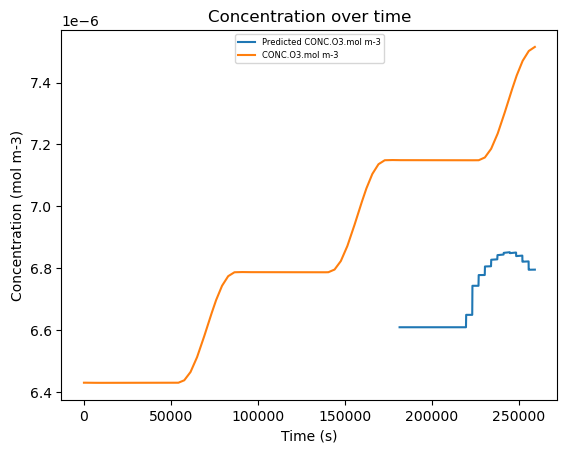

In [9]:
plt.plot(df['time.s'], conc_pred['Predicted CONC.O3.mol m-3'], label='Predicted CONC.O3.mol m-3')
plt.plot(df['time.s'], df['CONC.O3.mol m-3'], label='CONC.O3.mol m-3')
plt.title('Concentration over time')
plt.ylabel('Concentration (mol m-3)')
plt.xlabel('Time (s)')
plt.legend(loc='upper center', fontsize=6)
plt.show()

## 9. Running and Evaluating the Random Forest Model

With the training and testing data already set up, there is not much work to get the random forest model running.</br>
However, one new thing here is the addition of the <i>n_estimators</i> argument which defines the number of trees in the model. Feel free to change this number to experiment.</br>
There is also an additional step in the <i>fit()</i> function, which is wrapping the y training data into NumPy's <i>ravel()</i> function due to a quirk with the <i>RandomForestRegressor</i> class.</br>
As with the linear regression model, it is fitted based on the training data, ran on the testing data, and then evaluated against the ground truth.</br>
Due to the use of the <i>ravel()</i> function, an additional line needs to be added at the top to fix the <i>y_pred</i> array's incorrect shape.</br>
To achieve this, the <i>reshape()</i> function is called with the -1 parameter representing any number of rows and the 1 parameter representing 1 column.</br>
Thus, this makes the <i>y_pred</i> array a single column with a row for every predicted time step.</br>
Do note how the random forest model is a bit more accurate than the linear model (~4.93e-7 RMSE vs ~5.24e-7 RMSE).</br>
This is expected behavior for the models, as linear regression should be less accurate than random forest when the data itself is not linear.

In [10]:
# Fit on training set
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train_scaled_df, np.ravel(y_train_scaled_df))

y_pred = model.predict(x_test_scaled_df)
y_pred = y_pred.reshape(-1, 1)
y_pred = y_scaler.inverse_transform(y_pred)
test_rmse = root_mean_squared_error(y_test, y_pred)
print(f"Test RMSE: {test_rmse}")

Test RMSE: 4.928728531233833e-07


## 10. Data Preparation for Visualization

This step is identical and achieves the same goal as step 7, refer to that step for an explanation.

In [11]:
conc_pred = pd.DataFrame(y_pred, index=y_test.index, columns=['Predicted CONC.O3.mol m-3'])
display(conc_pred)

conc_pred = conc_pred.reindex(df.index)
display(conc_pred)

,Predicted CONC.O3.mol m-3
3024,0.000007
3025,0.000007
3026,0.000007
3027,0.000007
3028,0.000007
...,...
4316,0.000007
4317,0.000007
4318,0.000007
4319,0.000007


,Predicted CONC.O3.mol m-3
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4316,0.000007
4317,0.000007
4318,0.000007
4319,0.000007


## 11. Plot the Random Forest Model

This step is identical and achieves the same goal as step 8 but with the random forest model, refer to that step for an explanation.</br>
Note how the predictions are slightly closer to the actual concentration curve on average compared to the linear model.

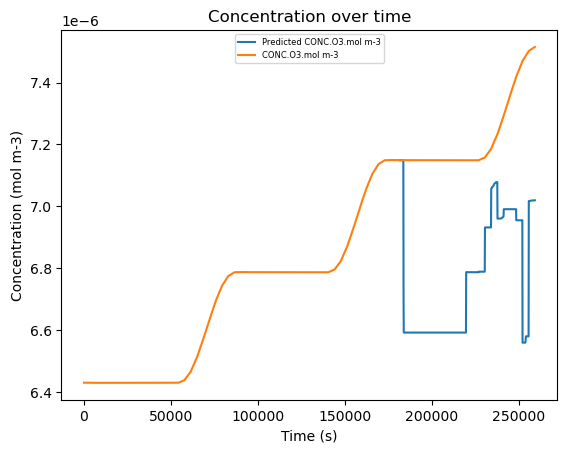

In [12]:
plt.plot(df['time.s'], conc_pred['Predicted CONC.O3.mol m-3'], label='Predicted CONC.O3.mol m-3')
plt.plot(df['time.s'], df['CONC.O3.mol m-3'], label='CONC.O3.mol m-3')
plt.title('Concentration over time')
plt.ylabel('Concentration (mol m-3)')
plt.xlabel('Time (s)')
plt.legend(loc='upper center', fontsize=6)
plt.show()